In [1]:
from __future__ import annotations

import pathlib

import polars
import seaborn
from matplotlib import pyplot as plt

_ = polars.Config.set_tbl_rows(100)

In [2]:
def load_data(directory: pathlib.Path) -> polars.DataFrame:
    dfs = []
    for run in directory.glob('**/results.csv'):
        df = polars.read_csv(run)
        dfs.append(df)
    return polars.concat(dfs).sort('exchange', 'chain_length', 'proxystore')

In [3]:
directory = pathlib.Path('../runs-prod/action-chain-v1/')
raw = load_data(directory)

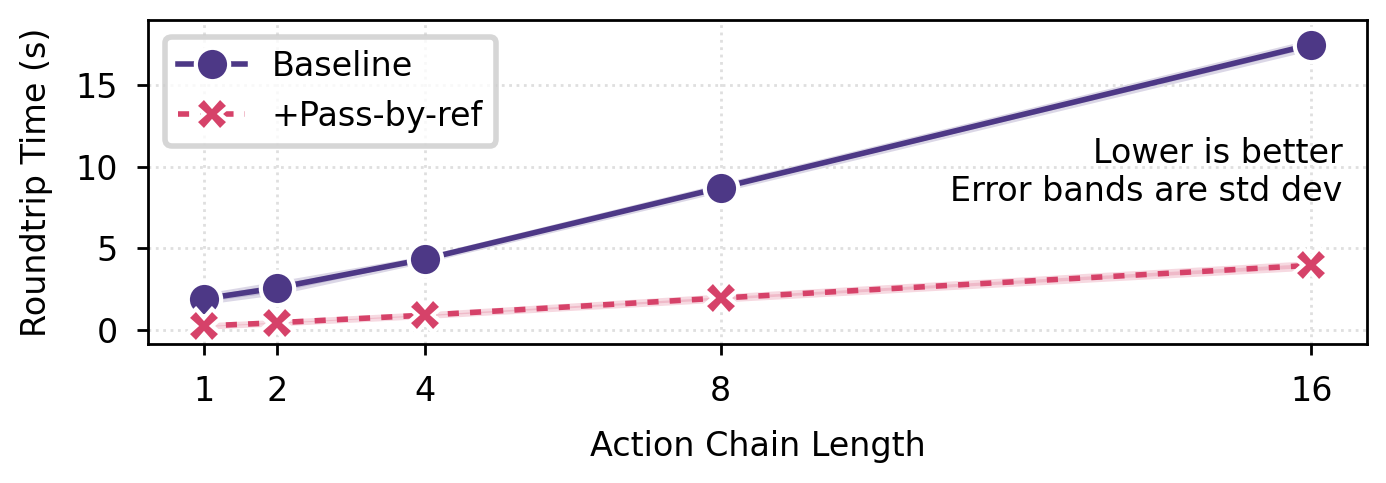

In [8]:
fig, axs = plt.subplots(1, 1)

xticks = sorted(set(raw['chain_length'].to_list()))

palette = {False: '#4D3886', True: '#D64269'}
markers = {False: 'o', True: 'X'}
dashes = {False: (), True: (2, 2)}

handle = seaborn.lineplot(
    raw,
    x='chain_length',
    y='time_s',
    hue='proxystore',
    errorbar='sd',
    style='proxystore',
    dashes=dashes,
    markers=markers,
    palette=palette,
    ax=axs,
)
handles, _ = axs.get_legend_handles_labels()
axs.legend(
    loc='upper left',
    handles=handles,
    title=None,
    labels=['Baseline', '+Pass-by-ref'],
)
_ = handle.set(
    # xscale='log',
    # yscale='log',
    xlabel='Action Chain Length',
    ylabel='Roundtrip Time (s)',
)
handle.set_xticks(xticks, minor=False)
handle.set_xticklabels([str(x) for x in xticks])
axs.tick_params(axis='x', which='minor', bottom=False)
axs.set(ylim=[-0.9, 19])

axs.annotate(
    'Lower is better\nError bands are std dev',
    xy=(0.98, 0.42),
    xycoords=('axes fraction'),
    ha='right',
    va='bottom',
)

fig.tight_layout()
plt.draw()
fig.set_size_inches(3.35, 0.9)
fig.savefig('figures/action-chain.pdf')